In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df_passenger = pd.read_csv("russian_passenger_air_service_2.csv")
df_cargo = pd.read_csv("russian_air_service_CARGO_AND_PARCELS.csv")

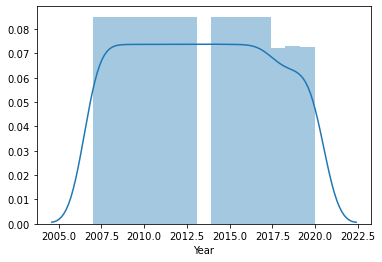

In [3]:
sns.distplot(df_passenger['Year'])

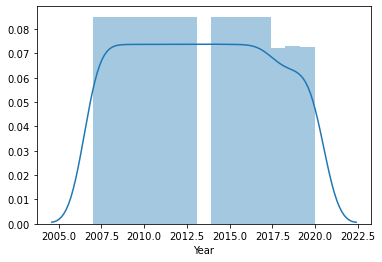

In [4]:
sns.distplot(df_cargo['Year'])

In [5]:
df_passenger.columns

Index(['Airport name', 'Year', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'Whole year', 'Airport coordinates'],
      dtype='object')

In [6]:
df_passenger.head()

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,13495,14940,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0,0,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0,0,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0,0,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255,4565,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('177.738273'), Decimal('64.713433'))"


In [7]:
df_passenger.describe()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
count,3961.000000,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3961.000000,3.961000e+03
mean,2013.324161,3.031445e+04,2.755062e+04,2.820968e+04,3.001708e+04,3.476017e+04,4.175026e+04,4.771815e+04,4.888993e+04,4.241617e+04,3.570571e+04,3.021245e+04,234.541005,4.204410e+05
std,3.969638,1.867992e+05,1.682710e+05,1.807836e+05,1.920722e+05,2.176587e+05,2.539412e+05,2.872099e+05,2.925108e+05,2.582981e+05,2.239536e+05,1.887233e+05,1547.251287,2.603713e+06
min,2007.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
50%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
75%,2017.000000,1.410000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
max,2020.000000,3.553862e+06,3.270201e+06,3.791106e+06,3.931552e+06,4.064441e+06,4.561143e+06,5.157112e+06,5.216328e+06,4.587248e+06,4.255424e+06,3.705650e+06,32533.800000,4.943854e+07


In [41]:
df_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airport name         3961 non-null   object 
 1   Year                 3961 non-null   int64  
 2   January              3961 non-null   int64  
 3   February             3961 non-null   int64  
 4   March                3961 non-null   int64  
 5   April                3961 non-null   int64  
 6   May                  3961 non-null   int64  
 7   June                 3961 non-null   int64  
 8   July                 3961 non-null   int64  
 9   August               3961 non-null   int64  
 10  September            3961 non-null   int64  
 11  October              3961 non-null   int64  
 12  November             3961 non-null   int64  
 13  December             3961 non-null   float64
 14  Whole year           3961 non-null   int64  
 15  Airport coordinates  3961 non-null   o

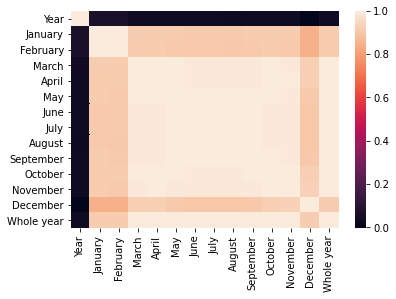

In [69]:
sns.heatmap(df_passenger.corr())

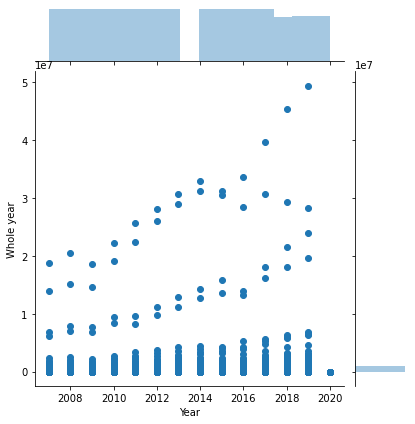

In [70]:
sns.jointplot(x='Year',y='Whole year',data=df_passenger,kind='scatter')

In [81]:
b = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]

long = df_passenger.melt(id_vars = ['Airport name', 'Year'],
         value_vars = b)

long.rename(columns = {'variable':'month', 'value':'passengers'}, inplace = True)
long['month'] = pd.Categorical(long['month'], categories=b, ordered=True)

per_year = long.groupby('Year')['passengers'].sum()/1000000
per_year = per_year.reset_index()
per_year

,Year,passengers
0,2007,68.778345
1,2008,77.022917
2,2009,69.506140
3,2010,86.498338
4,2011,97.302277
5,2012,110.139333
6,2013,124.065356
7,2014,135.651885
8,2015,135.182543
9,2016,133.185142


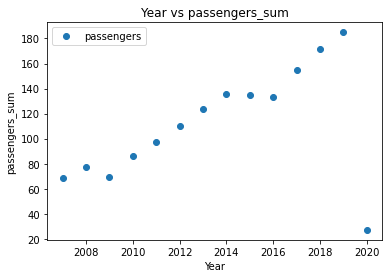

In [72]:
per_year.plot(x='Year', y='passengers', style='o')  
plt.title('Year vs passengers_sum')  
plt.xlabel('Year')  
plt.ylabel('passengers_sum')  
plt.show()

In [39]:
per_year = per_year[per_year['Year'] != 2020]

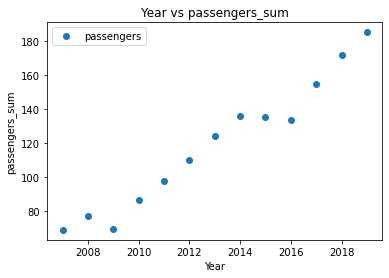

In [40]:
per_year.plot(x='Year', y='passengers', style='o')  
plt.title('Year vs passengers_sum')  
plt.xlabel('Year')  
plt.ylabel('passengers_sum')  
plt.show()

In [73]:
per_year.describe()

,Year,passengers
count,14.0000,14.000000
mean,2013.5000,112.543111
std,4.1833,44.158125
min,2007.0000,27.128912
25%,2010.2500,79.391772
50%,2013.5000,117.102345
75%,2016.7500,135.534550
max,2020.0000,184.972472


In [76]:
X = np.array(per_year['Year']).reshape(-1, 1)
y = np.array(per_year['passengers']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression().fit(X_train, y_train)
print("coeffs: ", regressor.coef_)
print("intercept: ", regressor.intercept_)

coeffs:  [[3.46507193]]
intercept:  [-6867.49544087]


In [77]:
#coef = pd.DataFrame(regressor.coef_, X.reshape(1,13), columns = ['Coeff'])

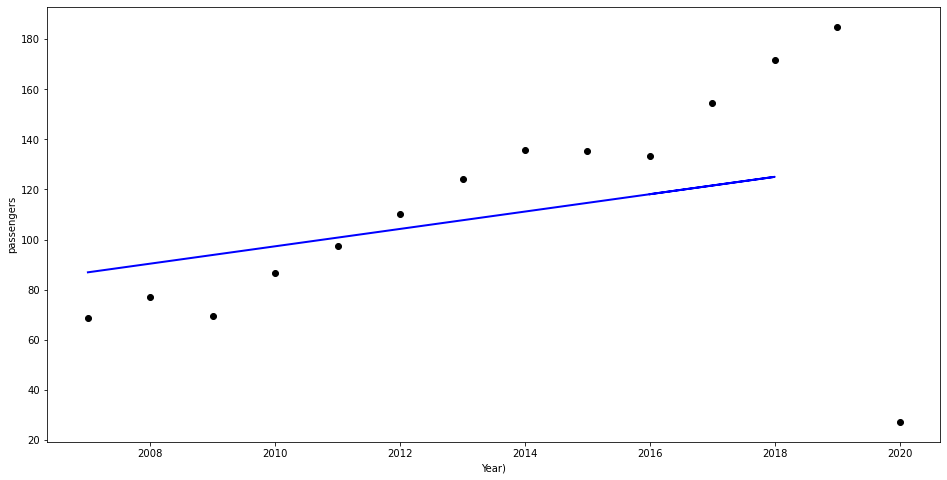

In [78]:
predictions = regressor.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(
    per_year['Year'],
    per_year['passengers'],
    c='black'
)
plt.plot(
    X_test,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Year)")
plt.ylabel("passengers")
plt.show()

In [79]:
print("Accuracy for Linear Regression: ", regressor.score(X_test, y_test))

Accuracy for Linear Regression:  0.4943932657561435
